# Condensed rates vs. experiments
## Zhang & Winfree 2009, Dabby 2013, Genot et al. 2011

# Initialization - Global

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import log10, sqrt

sns.set(style="darkgrid")

# Helper function to calculate Euclidean distance
def euclid(x, y, df, take_log=False):
    if take_log:
        return sqrt(sum((log10(df[x])-log10(df[y]))**2))
    else:
        return sqrt(sum((df[x]-df[y])**2))
    

## Initialization - Figure 1

In [2]:
from zhang2009_rates import data; z09r = data()
from dabby2013_rates import data; d13r = data()

Table1 = pd.DataFrame()

### Zhang and Winfree 2009

![title](../papers/raw_figures/zhang2009r_F1.svg)

In [3]:
for fig in z09r:
    fig.eval()
    fig.pepperargs['default']['release_cutoff'] = 10
    #display(fig.pepperargs['default'])
    for df in fig.get_dataframes():
        df['name']=fig.name 
        #display(df)
        dist = euclid('literature', 'calculated', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist))
        Table1 = Table1.append(df)


Zhang2009-3way-displacement -- Fitness: 0.669532
Zhang2009-3way-exchange -- Fitness: 2.9244


### Dabby 2013

![title](../papers/raw_figures/dabby2013.svg)

In [4]:
for fig in d13r:
    fig.eval()
    for df in fig.get_dataframes():
        df['name']=fig.name
        #display(df)
        dist = euclid('literature', 'calculated', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist))    
        Table1 = Table1.append(df)

Dabby2013-4way -- Fitness: 3.8421


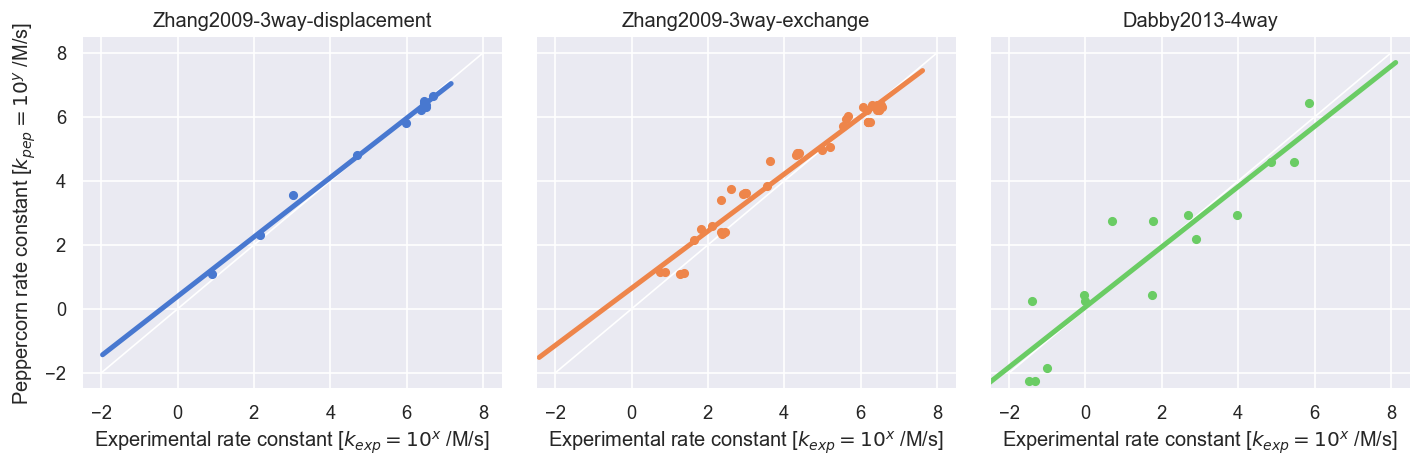

In [5]:
# Data adjustments:
tmpfig = Table1.copy()
tmpfig['literature'] = log10(tmpfig['literature'])
tmpfig['calculated'] = log10(tmpfig['calculated'])
#display(tmpfig)

# Figure size adjustments:
plt.rcParams['figure.dpi'] = 120

# Figure layout:
#sns.relplot(x="literature", y="calculated", hue='name', data=tmpfig)
#sns.jointplot(x="literature", y="calculated", data=tmpfig, kind="reg", color="m", height=5)
g = sns.lmplot(x="literature", y="calculated", col="name", hue='name', data=tmpfig, 
           col_wrap=3, ci=None, palette="muted", height=4, scatter_kws={"s": 20, "alpha": 1})
#sns.lmplot(x="literature", y="calculated", hue="name", truncate=False, height=5, data=tmpfig)

#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(-2, 8)
plt.xlim(-2.5, 8.5)
plt.ylim(-2.5, 8.5)

for ax in g.axes:
    ax.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)
    ax.set(xlabel='Experimental rate constant [$k_{exp} = 10^x $ /M/s]')
    
g.axes[0].set(ylabel='Peppercorn rate constant [$k_{pep} = 10^y $ /M/s]')
    
g.set_titles(row_template="{row_name}", col_template="{col_name}")

#plt.savefig('proximal_rates.pdf', bbox_inches='tight')
#plt.savefig('proximal_rates.svg', bbox_inches='tight')


# Genot et al. 2011

Note: Results for Figure 4D vary!!

![title](../papers/raw_figures/genot2011r_F3.svg)

![title](../papers/raw_figures/genot2011r_F4.svg)

In [6]:
from genot2011 import data; g11 = data()
Table2 = pd.DataFrame()

In [7]:
for e, fig in enumerate(g11):
    fig.pepperargs['detailed-default'] = fig.pepperargs['default'].copy()
    fig.pepperargs['detailed-default']['condensed'] = False
    if e == 0 :
        print(fig.pepperargs['default'])
        print(fig.pepperargs['detailed-default'])
        print(fig.pepperargs['detailed'])
        print(fig.pepperargs['condensed'])
    fig.eval('default', cmpfig=True)
    #fig.eval('detailed-default', cmpfig=True)
    #fig.eval('detailed', cmpfig=True)
    #fig.eval('condensed', cmpfig=True)
    for df in fig.get_dataframes():
        df['name']=fig.name
        dist = euclid('exp-time', 'sim-time', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name,dist))
        #display(df)
        Table2 = Table2.append(df)

{'condensed': True, 'conc': 'nM', 'k_fast': 20, 'k_slow': 1e-10}
{'condensed': False, 'conc': 'nM', 'k_fast': 20, 'k_slow': 1e-10}
{'conc': 'nM'}
{'condensed': True, 'conc': 'nM'}
Genot2011-F3 -- Fitness: 1.25303
Genot2011-F4A -- Fitness: 0.613898
Genot2011-F4B -- Fitness: 0.647157
Genot2011-F4C -- Fitness: 2.68698
Genot2011-F4D -- Fitness: 1.23311
Genot2011-SF4A -- Fitness: 1.98262


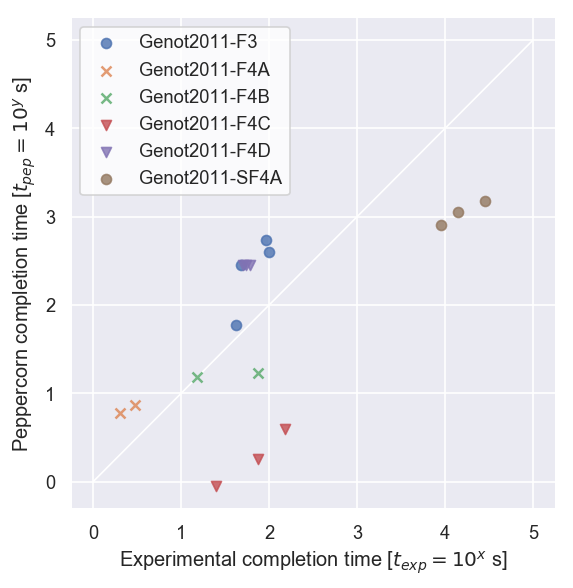

In [8]:
tmpfig = Table2.copy()
#tmpfig = tmpfig.loc[tmpfig['pepperargs'].isin(['default', 'detailed-default'])]
tmpfig['exp-time'] = log10(tmpfig['exp-time'])
tmpfig['sim-time'] = log10(tmpfig['sim-time'])
#display(tmpfig)

sns.set_palette("husl")
sns.set(rc={'figure.figsize':(8,8)})

mycolors = ['blue', 
            'red', 
            'green', 
            'orange', 
            'maroon', 
            'springgreen', 
            'cyan', 
            'magenta', 
            'yellow']
mycolors += list('kkkkkkkkkkk')
mymarker = list('po.*^v+_,phD8|_oooooooo')

g = sns.lmplot(x="exp-time", y="sim-time", hue='name', data=tmpfig, fit_reg=False, markers=['o', 'x', 'x', 'v', 'v', 'o'], legend=False)

# Adjust plot
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(0, 5)
#plt.xlim(mi, ma)
#plt.ylim(mi, 5)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

g.set(xlabel='Experimental completion time [$t_{exp} = 10^{x} $ s]')  
g.set(ylabel='Peppercorn completion time [$t_{pep} = 10^{y} $ s]')
    
#g.set_titles(row_template="{row_name}", col_template="{col_name}")
legend = plt.legend(ncol=1, loc='upper left');
frame = legend.get_frame()
frame.set_facecolor('white')
#frame.set_edgecolor('red')

plt.savefig('remote_rates.pdf', bbox_inches='tight')
plt.savefig('remote_rates.svg', bbox_inches='tight')